In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/Asma/Desktop/datass/bengaluru_house_prices.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
data["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [4]:
data.drop(["balcony","area_type","availability","society"],axis=1,inplace=True)
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [5]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
data["bhk"]=data["size"].apply(lambda x: int(x.split(" ")[0]))

In [9]:
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [10]:
data1=data[data["bhk"] > 20]
data1

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [11]:
data["total_sqft"].value_counts()

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: count, Length: 2067, dtype: int64

In [12]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
data[~data["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def conversion(x):
    token = x.split("-")
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
data2=data.copy()
data2["total_sqft"]=data2["total_sqft"].apply(conversion)
data2.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
data2["price_per_sqft"]=data2["price"]*100000/data2["total_sqft"]
data2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [18]:
data2["location"].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [19]:
data2["location"]=data2["location"].apply(lambda x: x.strip())

In [20]:
data2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [21]:
location_status=data2.groupby(["location"])["location"].count().sort_values(ascending=False)
location_status

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [22]:
location_less_data=location_status[location_status<10]
location_less_data

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [23]:
data2["location"]=data2["location"].apply(lambda x: "Others" if x in location_less_data else x)

In [24]:
data2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [25]:
data2["location"].value_counts()

location
Others                 2751
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: count, Length: 255, dtype: int64

In [26]:
data2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [27]:
data2[data2["total_sqft"]/data2["bhk"]<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [28]:
data4=data2[~(data2["total_sqft"]/data2["bhk"]<300)]
data4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [57]:
data4.shape

(12502, 7)

In [59]:
data4["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [61]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df .groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [63]:
data5=remove_outliers(data4)
data5.shape


(10222, 7)

In [65]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(10,5))
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 bhk",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3 bhk",s=50)
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

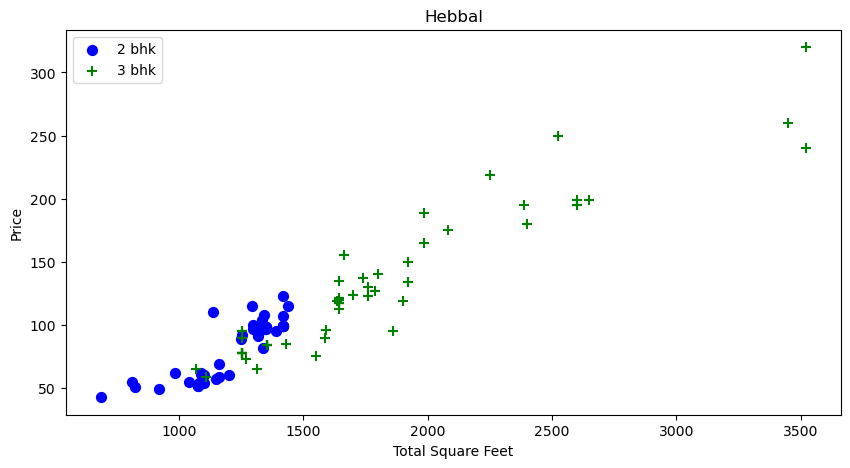

In [67]:
scatter_plot(data5,"Hebbal")

In [69]:
def bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
            "mean":np.mean(bhk_df.price_per_sqft),
            "std":np.std(bhk_df.price_per_sqft),
            "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
                
    return df.drop(exclude_indices,axis="index")
            
                
            
                                              

In [71]:
data6=bhk_outliers(data5)
data6.shape

(7369, 7)

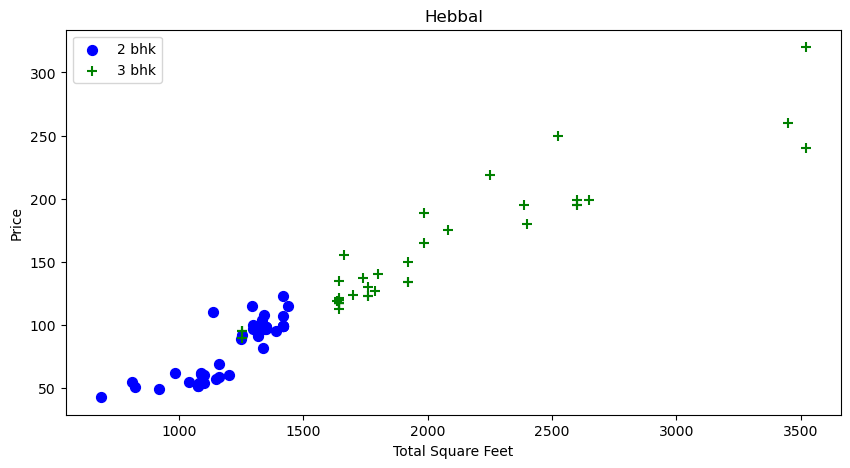

In [73]:
scatter_plot(data6,"Hebbal")

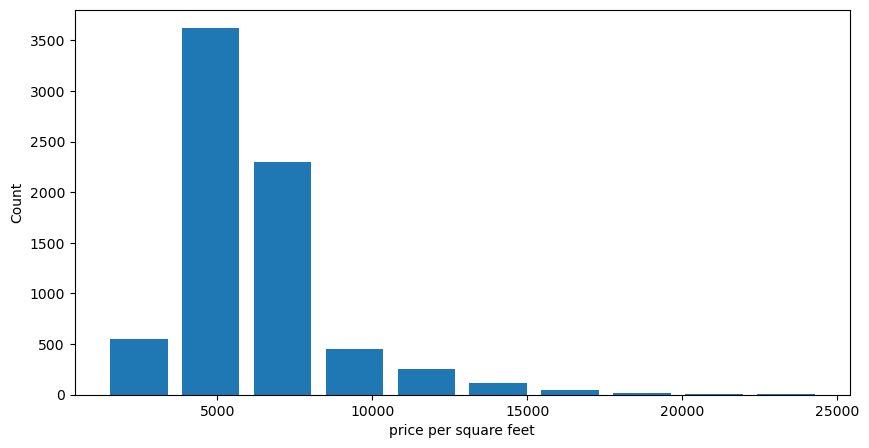

In [75]:
plt.figure(figsize=(10,5))
plt.hist(data6["price_per_sqft"],rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("Count")
plt.show()

#gaussian curve normal distribution

In [77]:
data6["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

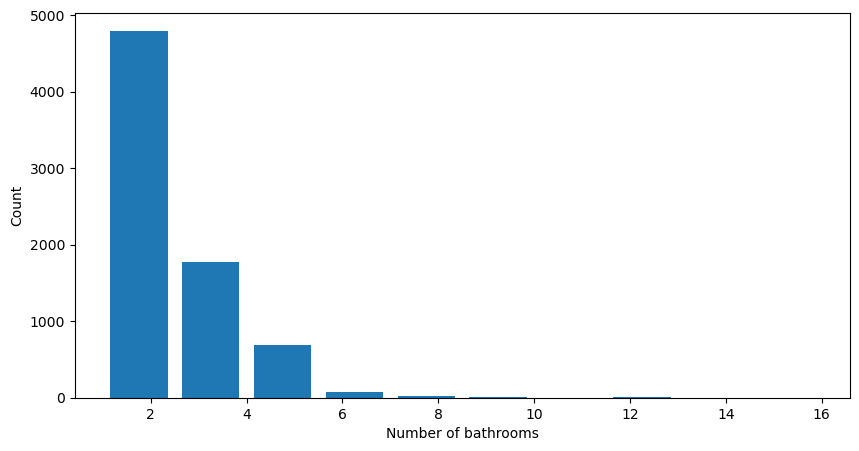

In [79]:
plt.figure(figsize=(10,5))
plt.hist(data6["bath"],rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [81]:
data6[data6["bath"]>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5972,Others,10 BHK,12000.0,12.0,525.0,10,4375.000000
6058,Others,16 BHK,10000.0,16.0,550.0,16,5500.000000
6754,Others,11 BHK,6000.0,12.0,150.0,11,2500.000000
7067,Others,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [83]:
data6[data6["bath"]>data6["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5901,Others,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8993,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [85]:
data7=data6[data6["bath"]<data6["bhk"]+2]
data7.shape

(7291, 7)

In [87]:
Newdata=data7.drop(["size","price_per_sqft"],axis=1)
Newdata

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10211,Yeshwanthpur,1195.0,2.0,100.0,2
10212,Yeshwanthpur,1692.0,3.0,108.0,3
10214,Yeshwanthpur,2500.0,5.0,185.0,6
10219,Yeshwanthpur,1855.0,3.0,135.0,3


In [89]:
Newdata["bath"]=Newdata["bath"].apply(lambda x :  int(x))

In [91]:
Newdata

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2
...,...,...,...,...,...
10211,Yeshwanthpur,1195.0,2,100.0,2
10212,Yeshwanthpur,1692.0,3,108.0,3
10214,Yeshwanthpur,2500.0,5,185.0,6
10219,Yeshwanthpur,1855.0,3,135.0,3


In [93]:
Newdata=Newdata[["location","bhk","bath","total_sqft","price"]]
Newdata

,location,bhk,bath,total_sqft,price
0,1st Block Jayanagar,4,4,2850.0,428.0
1,1st Block Jayanagar,3,3,1630.0,194.0
2,1st Block Jayanagar,3,2,1875.0,235.0
3,1st Block Jayanagar,3,2,1200.0,130.0
4,1st Block Jayanagar,2,2,1235.0,148.0
...,...,...,...,...,...
10211,Yeshwanthpur,2,2,1195.0,100.0
10212,Yeshwanthpur,3,3,1692.0,108.0
10214,Yeshwanthpur,6,5,2500.0,185.0
10219,Yeshwanthpur,3,3,1855.0,135.0


In [107]:
Newdata["location"].unique()

array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billek

In [95]:
dummies=pd.get_dummies(Newdata.location, dtype=int)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
New_data=pd.concat([Newdata,dummies.drop("Others",axis="columns")],axis="columns")
New_data.head(5)

,location,bhk,bath,total_sqft,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,4,2850.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,3,1630.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,2,1875.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3,2,1200.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,2,1235.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
New_data.drop("location",axis=1,inplace=True)
New_data.head(3)

,bhk,bath,total_sqft,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,4,2850.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,1630.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,1875.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
x=New_data.drop("price",axis=1)
x.head(3)

,bhk,bath,total_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
y=New_data["price"]
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10211    100.0
10212    108.0
10214    185.0
10219    135.0
10220    160.0
Name: price, Length: 7291, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [111]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [113]:
y_predict=lr.predict(x_test)
y_predict

array([ 98.3824544 , 178.16185877,  31.84654332, ...,  37.09625206,
        75.98353429,  96.81257201])

In [115]:
accuracy_lr=r2_score(y_test,y_predict)*100
accuracy_lr

87.32691068586647

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [120]:
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([121.48006536, 252.41666667,  54.13013152, ...,  60.21516667,
        78.52233333,  90.67924393])

In [161]:
accuracy_rfr=r2_score(y_test,y_pred_rfr)*100
accuracy_rfr

88.00475241572431

In [227]:
model_eval={"Model_names":["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","KNeighborRegressor","SVR"],"Accuracy":[round(accuracy_lr),round(rs_dt),round(accuracy_rfr),round(rs_kn),round(rs_svr)]}
model_evaluation=pd.DataFrame(model_eval)
model_evaluation

,Model_names,Accuracy
0,LinearRegression,87
1,DecisionTreeRegressor,82
2,RandomForestRegressor,88
3,KNeighborRegressor,76
4,SVR,48


In [163]:
from sklearn.model_selection import GridSearchCV

In [165]:
gridpara_randomforest={"n_estimators":[200,50,500],"max_depth":[10,20],"min_samples_split":[2,5],"min_samples_leaf":[2,1]}

In [167]:
gridsearch_randomforest=GridSearchCV(rfr,gridpara_randomforest,cv=5)

In [169]:
gridsearch_randomforest.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 1],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 50, 500]})

In [171]:
best_rfr=gridsearch_randomforest.best_params_
best_rfr

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [173]:
bestmodel_rfr=gridsearch_randomforest.best_estimator_
bestmodel_rfr

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=500)

In [175]:
accuracy_rfr=bestmodel_rfr.score(x_train,y_train)*100
accuracy_rfr

92.88189680819157

In [177]:
accuracy_rfr=bestmodel_rfr.score(x_test,y_test)*100
accuracy_rfr

89.6789157073288

In [239]:
def predict_price(location,bhk,bath,total_sqft):
    
    
    loc_index = np.where(x.columns == location)[0][0]
    z = np.zeros(len(x.columns))
    z[0] = bhk
    z[1] = bath
    z[2] = total_sqft
    if loc_index >= 0:
        z[loc_index] = 1
        
    return bestmodel_rfr.predict([z])[0]

In [221]:
import pickle

In [225]:
with open("banglore_home_price_model.pkl","wb") as file:
    pickle.dump(bestmodel_rfr,file)

In [257]:
import json
columns={
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))